<a href="https://colab.research.google.com/github/arifuddinatif/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [1]:
#for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

#for ML
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/Supervised ML - Classification/dat files/Coronavirus Tweets.csv',encoding='latin-1')

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
type(df['Sentiment'][4])

int

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
type(df['Sentiment'][0])

str

In [ ]:
type(df['OriginalTweet'][2])

str

In [ ]:
df['OriginalTweet'].unique()

array(['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8',
       'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order',
       'Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P',
       ...,
       'You know itÂ\x92s getting tough when @KameronWilds  is rationing toilet paper #coronavirus #toiletpaper @kroger martinsville, help us out!!',
       'Is it wrong that the smell of hand sanitizer is starting to turn me on?\r\r\n\r\r\n#coronavirus #COVID19 #coronavirus',
       "@TartiiCat Well new/used Rift S are going for $700.00 on Amazon rn although the normal market price is usually $400.00 . Prices are really crazy right now for vr headsets since HL Alex was a

In [ ]:
a = df['OriginalTweet'][2]

In [ ]:
a = a.split(' ')

In [ ]:
a

['Coronavirus',
 'Australia:',
 'Woolworths',
 'to',
 'give',
 'elderly,',
 'disabled',
 'dedicated',
 'shopping',
 'hours',
 'amid',
 'COVID-19',
 'outbreak',
 'https://t.co/bInCA9Vp8P']

In [ ]:
b = []
for i in a:
  if 'https' in i:
    pass
  else:
    b.append(i)  


In [ ]:
b

['Coronavirus',
 'Australia:',
 'Woolworths',
 'to',
 'give',
 'elderly,',
 'disabled',
 'dedicated',
 'shopping',
 'hours',
 'amid',
 'COVID-19',
 'outbreak']

In [ ]:
c = ' '.join(b)

In [ ]:
c

'Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak'

In [ ]:
z = []
f = []
for i in range(10):
  z.append(i)
  for j in range(11,20):
    f.append(z[0]-j)


In [ ]:
z

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
f

In [ ]:
for i in range(len(df['OriginalTweet'])):
  a.append(df['OriginalTweet'][i].split(' '))

In [ ]:
a

In [27]:
list_of_tweets = []
b = []
c = []
for i in range(len(df['OriginalTweet'])):
  a = df['OriginalTweet'][i].split(' ')
  for j in a:
    if 'https' in j:
      pass
    else:
      b.append(j) 
  c.append(' '.join(b))
  b = []
for l in c:
  list_of_tweets.append(l)  


In [ ]:
list_of_tweets[2]

'Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak'

In [28]:
df['OriginalTweet'] = list_of_tweets

In [ ]:
df['OriginalTweet'][2]

In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
import string
from nltk.corpus import stopwords

In [19]:
# function to remove punctuations and stopwords

def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [30]:
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x : text_process(x))

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,MeNyrbie PhilGahan Chrisitv,Neutral
1,3800,48752,UK,16-03-2020,advice Talk neighbours family exchange phone n...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia Woolworths give elderly ...,Positive
3,3802,48754,NaN,16-03-2020,food stock one empty PLEASE dont panic ENOUGH ...,Positive
4,3803,48755,NaN,16-03-2020,ready go supermarket COVID19 outbreak Im paran...,Extremely Negative


In [ ]:
df['OriginalTweet'][1]

'advice Talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist GP set online shopping accounts poss adequate supplies regular meds order'

In [ ]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [31]:
for i in range(len(df['Sentiment'])):
  if df['Sentiment'][i] == 'Extremely Negative':
    df['Sentiment'][i] = 'Negative'
  elif df['Sentiment'][i] == 'Extremely Positive':
    df['Sentiment'][i] = 'Positive'

In [32]:
for i in range(len(df['Sentiment'])):
  if df['Sentiment'][i] == 'Negative':
    df['Sentiment'][i] = -1
  elif df['Sentiment'][i] == 'Positive':
    df['Sentiment'][i] = 1
  elif df['Sentiment'][i] == 'Neutral': 
    df['Sentiment'][i] = 0

In [33]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [34]:
df['OriginalTweet'] = df['OriginalTweet'].apply(stemming)

In [35]:
vectorizer = CountVectorizer(max_df = 0.9,min_df = 10)
X = vectorizer.fit_transform(df['OriginalTweet'])
X = X.toarray() 
y = df['Sentiment']
y=y.astype('int')

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 225)
print('x_train shape: ',x_train.shape)
print('x_test shape: ',x_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (32925, 5121)
x_test shape:  (8232, 5121)
y_train shape:  (32925,)
y_test shape:  (8232,)


In [37]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
prediction_test = model.predict(x_test)
prediction_train = model.predict(x_train)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix

[[11029   464   787]
 [  441  5130   436]
 [  829   560 13249]]


[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

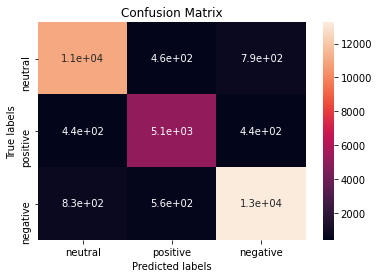

In [41]:
labels = ['neutral', 'positive','negative']
cm = confusion_matrix(prediction_train,y_train)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[2469  220  382]
 [ 256 1099  237]
 [ 374  240 2955]]


[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

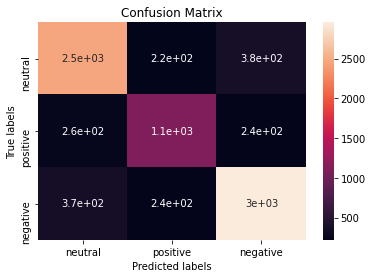

In [42]:

labels = ['neutral', 'positive','negative']
cm = confusion_matrix(prediction_test,y_test)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [43]:
print('Accuracy score of train set: ',accuracy_score(prediction_train,y_train))
print('Precision of train set: ',precision_score(prediction_train,y_train, average = 'weighted'))
print('Recall of train set: ',recall_score(prediction_train,y_train, average = 'weighted'))

Accuracy score of train set:  0.8931814730447988
Precision of train set:  0.8935578984374115
Recall of train set:  0.8931814730447988


In [44]:
print('Accuracy score of test set: ',accuracy_score(prediction_test,y_test))
print('Precision of test set: ',precision_score(prediction_test,y_test, average = 'weighted'))
print('Recall of test set: ',recall_score(prediction_test,y_test, average = 'weighted'))

Accuracy score of test set:  0.7923955296404276
Precision of test set:  0.7920093688475931
Recall of test set:  0.7923955296404276


In [45]:
print(classification_report(y_test,prediction_test))
print("\n")
print(classification_report(y_train,prediction_train))

              precision    recall  f1-score   support

          -1       0.80      0.80      0.80      3099
           0       0.69      0.70      0.70      1559
           1       0.83      0.83      0.83      3574

    accuracy                           0.79      8232
   macro avg       0.77      0.78      0.78      8232
weighted avg       0.79      0.79      0.79      8232



              precision    recall  f1-score   support

          -1       0.90      0.90      0.90     12299
           0       0.85      0.83      0.84      6154
           1       0.91      0.92      0.91     14472

    accuracy                           0.89     32925
   macro avg       0.89      0.88      0.88     32925
weighted avg       0.89      0.89      0.89     32925



#boosting

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

In [47]:
# Hyperparameter tuning

classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(x_train, y_train)

ValueError: ignored

#EDA

In [ ]:
a = list(df['Location'].unique())

In [ ]:
a

In [ ]:
len(df['Location'])

41157

In [ ]:
df['TweetAt'].unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,menyrbi philgahan chrisitv,0
1,3800,48752,UK,16-03-2020,advic talk neighbour famili exchang phone numb...,1
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworth give elder dis...,1
3,3802,48754,NaN,16-03-2020,food stock one empti pleas dont panic enough f...,1
4,3803,48755,NaN,16-03-2020,readi go supermarket covid19 outbreak im paran...,2


#cleaning TweetAt column

In [4]:
from datetime import datetime
def change_to_timestamp(column):
  return datetime.strptime(column, '%d-%m-%Y') 

In [5]:
df['TweetAt'] = df['TweetAt'].apply(change_to_timestamp)

In [ ]:
type(df['TweetAt'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df['TweetAt'][20].year

2020

In [ ]:
df['TweetMonth'] = df['TweetAt'].apply(lambda x : x.month)

Text(0.5, 1.0, 'Sentiment distributions')

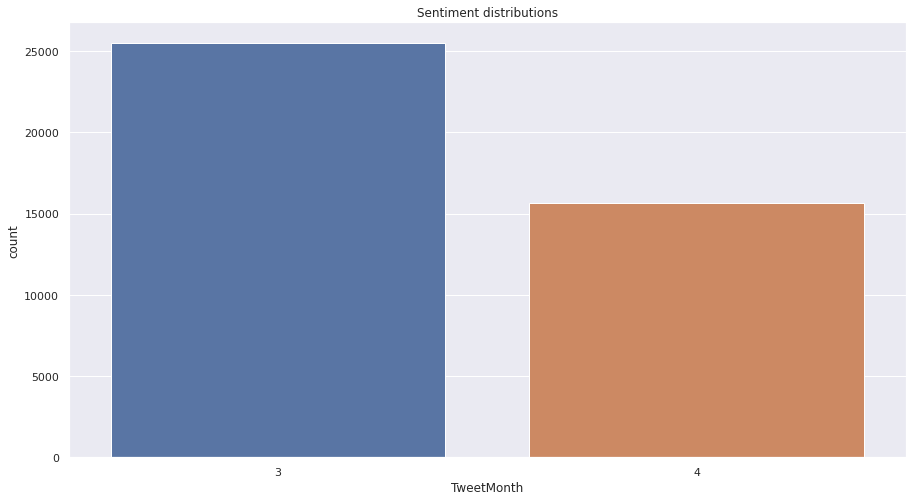

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x=df['TweetMonth'])
plt.title('Sentiment distributions')

In [ ]:
df['TweetAt'].unique()

array(['2020-03-16T00:00:00.000000000', '2020-03-17T00:00:00.000000000',
       '2020-03-18T00:00:00.000000000', '2020-03-19T00:00:00.000000000',
       '2020-03-20T00:00:00.000000000', '2020-03-21T00:00:00.000000000',
       '2020-03-22T00:00:00.000000000', '2020-03-23T00:00:00.000000000',
       '2020-03-24T00:00:00.000000000', '2020-03-25T00:00:00.000000000',
       '2020-03-26T00:00:00.000000000', '2020-03-27T00:00:00.000000000',
       '2020-03-28T00:00:00.000000000', '2020-03-29T00:00:00.000000000',
       '2020-03-30T00:00:00.000000000', '2020-03-31T00:00:00.000000000',
       '2020-04-01T00:00:00.000000000', '2020-04-02T00:00:00.000000000',
       '2020-04-03T00:00:00.000000000', '2020-04-04T00:00:00.000000000',
       '2020-04-05T00:00:00.000000000', '2020-04-06T00:00:00.000000000',
       '2020-04-07T00:00:00.000000000', '2020-04-08T00:00:00.000000000',
       '2020-04-09T00:00:00.000000000', '2020-04-10T00:00:00.000000000',
       '2020-04-11T00:00:00.000000000', '2020-04-12

In [ ]:
df['TweetAt'][9].day

16

In [ ]:
list_of_month_3 = []
list_of_month_4 = []
for i in range(len(df['TweetAt'])):
  if df['TweetAt'][i].month == 3:
    list_of_month_3.append(df['TweetAt'][i].day)
  if df['TweetAt'][i].month == 4:
    list_of_month_4.append(df['TweetAt'][i].day)  


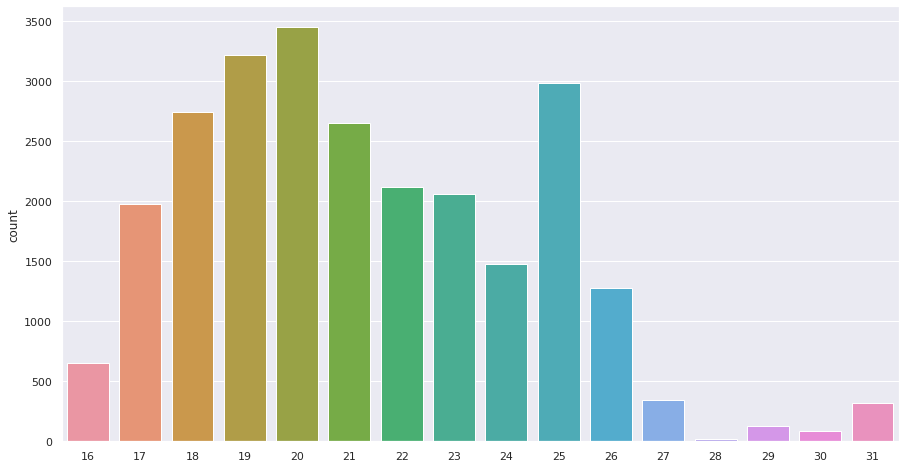

In [ ]:
sns.countplot(x=list_of_month_3)

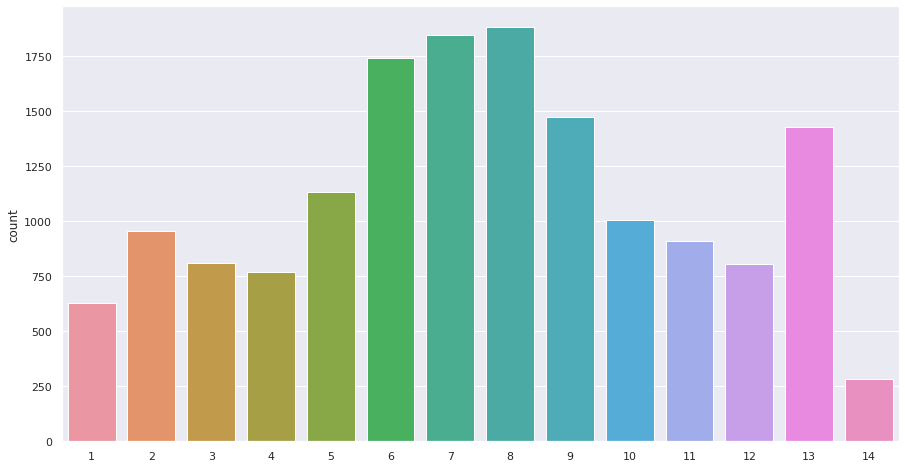

In [ ]:
sns.countplot(x=list_of_month_4)

In [ ]:
list(df['Location'].unique())

In [7]:
list_of_locations =[]
for i in range(len(df['Location'])):
  location = str(df['Location'][i]).split(',')
  list_of_locations.append(location[0])

In [8]:
list_of_locations.remove('Somewhere gettin $$')

In [9]:
list_of_locations.remove('The FLO$$/HowardU')

In [ ]:
sns.countplot(x=list_of_locations)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       41157 non-null  int64         
 1   ScreenName     41157 non-null  int64         
 2   Location       32567 non-null  object        
 3   TweetAt        41157 non-null  datetime64[ns]
 4   OriginalTweet  41157 non-null  object        
 5   Sentiment      41157 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.9+ MB


In [12]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative
